### This is for Lab04 of COMP9517

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q1 watershed doing the segmentation of the ball picture

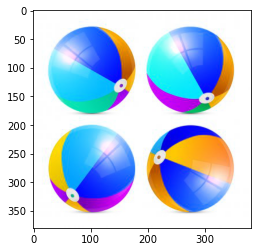

In [2]:
# Reading the bgr image from the dir
image_input = cv2.imread('./ball_set.jpg')
plt.imshow(image_input)

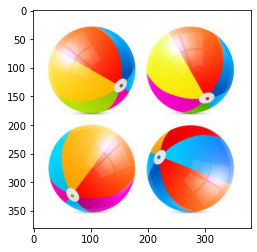

In [3]:
# change the color to rgb
# This is for question 2 MeanShift
image_rgb = cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

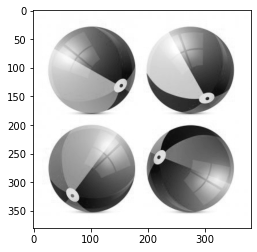

In [4]:
# Change the rgb image to gray image
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
# img_gray = (255-img_gray)
plt.imshow(image_gray,'gray')

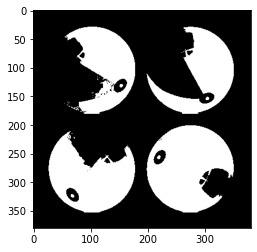

In [5]:
# Watershed needs the binary image which need the cv2.threshold
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

# Otsu’s Binarization
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

# This 169 is for filtering the color gray
ret, image_thresh = cv2.threshold(image_gray,159 ,180 , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(image_thresh, 'gray')

In [6]:
# Start using the watershed Algorithm
# Some of the codes are from the following sample provided by the instruction of Lab04
# Source: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

In [7]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

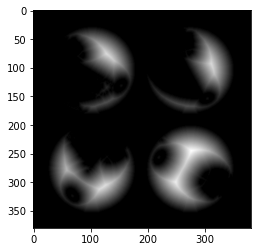

In [8]:
# This method is used to calculate the Euclidean distance
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html
distance = ndi.distance_transform_edt(image_thresh)
# Show the image of Euclidean distance
plt.imshow(distance, 'gray')

In [9]:
# Finding local maximum by using peak_local_max
# Source: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html
local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)

<ipython-input-9-059884ba611e>:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)


In [10]:
# Getting the maximum points and tag the labels 
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html
# Getting the first part of the output
markers = ndi.label(local_max_point)[0]

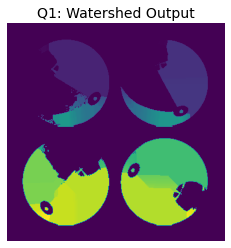

In [11]:
# Getting the labeled image based on the markers
labels = watershed(-distance, markers, mask=image_thresh)
plt.axis('off')
plt.title("Q1: Watershed Output",fontsize=14)
plt.imshow(labels)
plt.savefig("Q1_Watershed.jpg")

In [12]:
# Show the image with the spectrum 
# This can help you see the boundry clearly
# plt.imshow(labels,cmap=plt.cm.nipy_spectral)

### Q2 MeanShift doing the segmentation of the ball picture

In [13]:
from sklearn.cluster import MeanShift

(380, 380, 3)


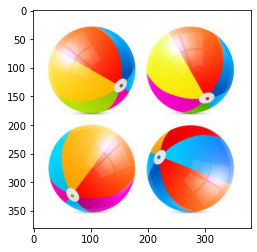

In [14]:
# Question 2 will use the previous rgb image
# Can also use the bgr version 
# Notice the sequence of the rgb or bgr
plt.imshow(image_rgb)
print(image_rgb.shape)

In [15]:
# Based on the information of piazza
# Resized the image to 100,100

In [16]:
resized_image = cv2.resize(image_rgb,(100,100))
print(resized_image.shape)
print(image_rgb.shape)

(100, 100, 3)
(380, 380, 3)


In [17]:
# The following part is doting the resize operation

In [18]:
# Using the slice method to cut the channel from the image
channel_r = resized_image[:,:,0]
channel_g = resized_image[:,:,1]
channel_b = resized_image[:,:,2]

In [19]:
# Check the shape of each channel
# Shape are same can also check once
print(f"The size of resized channel red is {channel_r.shape}")
print(f"The size of resized channel green is {channel_g.shape}")
print(f"The size of resized channel blue is {channel_b.shape}")

The size of resized channel red is (100, 100)
The size of resized channel green is (100, 100)
The size of resized channel blue is (100, 100)


In [20]:
# Flatten the color matrix
# Source: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
red_flatten = channel_r.flatten()
green_flatten = channel_g.flatten()
blue_flatten = channel_b.flatten()

In [21]:
# Stack each channel itseld get 3 seperate result
color_samples_single_r = np.column_stack([red_flatten])
color_samples_single_g = np.column_stack([green_flatten])
color_samples_single_b = np.column_stack([blue_flatten])

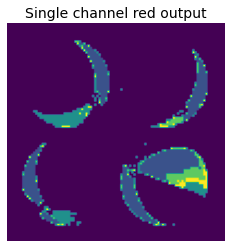

In [22]:
# for red channel doing the flatten
# How to use meanshift
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
ms_clf_r = MeanShift(bandwidth=20, bin_seeding=True)
ms_labels_single_r = ms_clf_r.fit_predict(color_samples_single_r).reshape(100,100)
plt.axis('off')
plt.title("Single channel red output",fontsize=14)
plt.imshow(ms_labels_single_r)

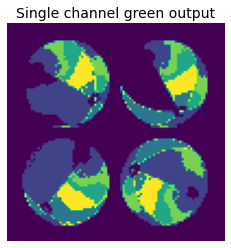

In [23]:
# for green channel doing the flatten
ms_clf_g = MeanShift(bandwidth=20,bin_seeding=True)
ms_labels_single_g = ms_clf_g.fit_predict(color_samples_single_g).reshape(100,100)
plt.axis('off')
plt.title("Single channel green output",fontsize=14)
plt.imshow(ms_labels_single_g)

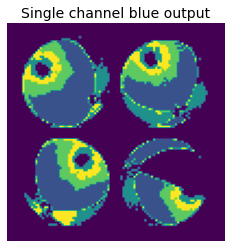

In [24]:
# for blue channel doing the flatten
ms_clf_b = MeanShift(bandwidth=20,bin_seeding=True)
ms_labels_single_b = ms_clf_b.fit_predict(color_samples_single_b).reshape(100,100)
plt.axis('off')
plt.title("Single channel blue output",fontsize=14)
plt.imshow(ms_labels_single_b)

In [25]:
# Stack 3 channels together and get the final result of question 2
color_samples_total = np.column_stack([red_flatten,green_flatten,blue_flatten])
print(color_samples_total.shape)

(10000, 3)


In [26]:
# Setting classifier
# This meanshift of Q2 is resize to 100 * 100 * 3 which is mentioned on the piazza
ms_clf = MeanShift(bin_seeding=True)
Q2_ms_labels = ms_clf.fit_predict(color_samples_total).reshape(100,100)

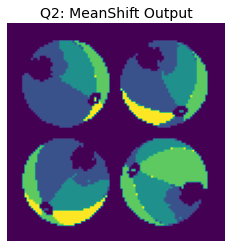

In [27]:
# print(ms_labels.shape)
plt.axis('off')
plt.title("Q2: MeanShift Output",fontsize=14)
# Print the resize result
plt.imshow(Q2_ms_labels)
plt.savefig('Q2_MeanShift.jpg')

### Q3 change the image to the plannet

In [28]:
# Read the plannet

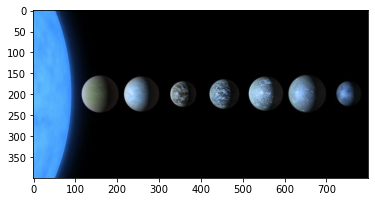

In [29]:
# The input image is bgr format
planet_input = cv2.imread('./planets.jpg')
plt.imshow(planet_input)

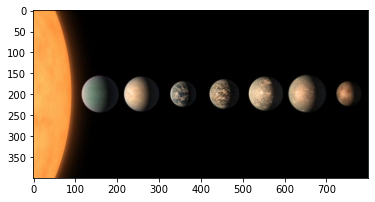

In [30]:
# RGB image
planet_rgb = cv2.cvtColor(planet_input,cv2.COLOR_BGR2RGB)
plt.imshow(planet_rgb)

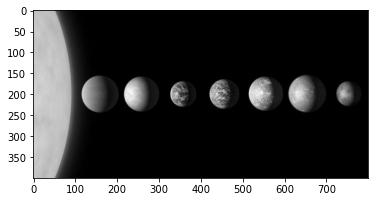

In [31]:
# Gray image
planet_gray = cv2.cvtColor(planet_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(planet_gray,'gray')

### Watershed method ------ Planets

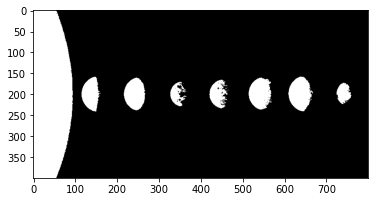

In [32]:
# This is same as the previous watershed method 
planet_ret, planet_thresh = cv2.threshold(planet_gray, 70 , 253 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(planet_thresh, 'gray')

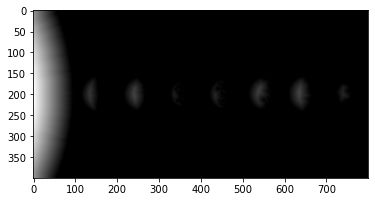

In [33]:
planet_distance = ndi.distance_transform_edt(planet_thresh)
# Show the image of Euclidean distance
plt.imshow(planet_distance,'gray')

In [34]:
# get the maximum point of the planet image
planet_max_point = peak_local_max(planet_distance,indices=False,footprint=np.ones((4,4)),labels=planet_thresh)

<ipython-input-34-444f89a57f4e>:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  planet_max_point = peak_local_max(planet_distance,indices=False,footprint=np.ones((4,4)),labels=planet_thresh)


In [35]:
# Get the marker
planet_markers = ndi.label(planet_max_point)[0]

In [36]:
# Get the label
planet_labels = watershed(-planet_distance, planet_markers, mask=planet_thresh)

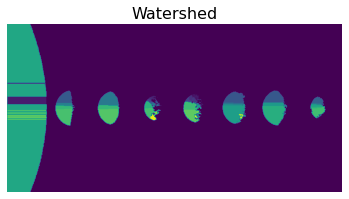

In [37]:
plt.axis('off')
plt.title("Watershed",fontsize=16)
plt.imshow(planet_labels)

In [38]:
# This is to print the image as the spectral image
# plt.imshow(planet_labels,plt.cm.nipy_spectral)

### MeanShift ----- Planets

In [39]:
# check the current size of the planet image
planet_rgb.shape

(400, 800, 3)

In [40]:
# resize the planets
# set 800 400 is means no resize
# can also change the parameter here to speed up!
resized_planets = cv2.resize(planet_rgb,(800,400))
print(resized_planets.shape)

(400, 800, 3)


In [41]:
# Using slice the r g b 3 channels
planets_channel_r = resized_planets[:,:,0]
planets_channel_g = resized_planets[:,:,1]
planets_channel_b = resized_planets[:,:,2]

In [42]:
# print the size of the channel
print(f"The size of resized channel red in planets is {planets_channel_r.shape}")
print(f"The size of resized channel green in planets is {planets_channel_g.shape}")
print(f"The size of resized channel blue in planets is {planets_channel_b.shape}")

The size of resized channel red in planets is (400, 800)
The size of resized channel green in planets is (400, 800)
The size of resized channel blue in planets is (400, 800)


In [43]:
# This is based on the lab instruction flatten each channel and stack
planets_red_flatten = planets_channel_r.flatten()
planets_green_flatten = planets_channel_g.flatten()
planets_blue_flatten = planets_channel_b.flatten()

In [44]:
# To improve the quality use the hole picture
# No resize
print(planets_red_flatten.shape)

(320000,)


In [45]:
# To improve the quality use the hole picture
# No resize
print(planets_green_flatten.shape)

(320000,)


In [46]:
# To improve the quality use the hole picture
# No resize
print(planets_blue_flatten.shape)

(320000,)


In [47]:
# Stack 3 channels from planets together
color_samples_planets = np.column_stack([planets_red_flatten,planets_green_flatten,planets_blue_flatten])
print(color_samples_planets.shape)

(320000, 3)


In [48]:
# Start using the meanshift method
# Setting the bandwidth as a larger value can help to speed up
# The meaning of bandwidth in the meanshift
# Source: https://softwareengineering.stackexchange.com/questions/388313/how-to-define-the-bandwidth-in-mean-shift-clustering
ms_planets_clf = MeanShift(bandwidth=5,bin_seeding=True)
ms_labels = ms_planets_clf.fit_predict(color_samples_planets)

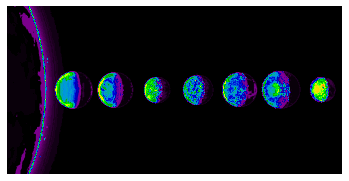

In [49]:
# reshape the size to 800 *400
# using the nipy_spectral image can easily find the detail of the image
new_planet = ms_labels.reshape(400,800)
plt.axis('off')
plt.imshow(new_planet,plt.cm.nipy_spectral)

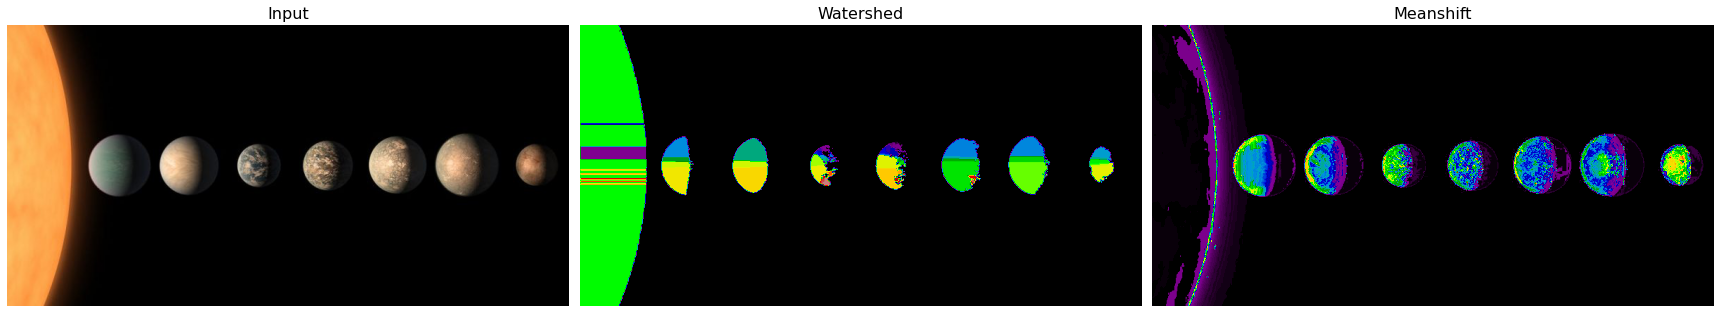

In [50]:
# set the image as 8 with 3 images
plt.figure(figsize=(24,8))

# The first image is the Input planets
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Input',fontsize=16)
plt.imshow(planet_rgb)

# The second image is the Watershed output
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Watershed',fontsize=16)
plt.imshow(planet_labels,plt.cm.nipy_spectral)

# The second image is the Meanshift output
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Meanshift',fontsize=16)
plt.imshow(new_planet,plt.cm.nipy_spectral)

# Save the image
plt.tight_layout()
plt.savefig("Q3_planets_output_spectral.jpg")
plt.show()

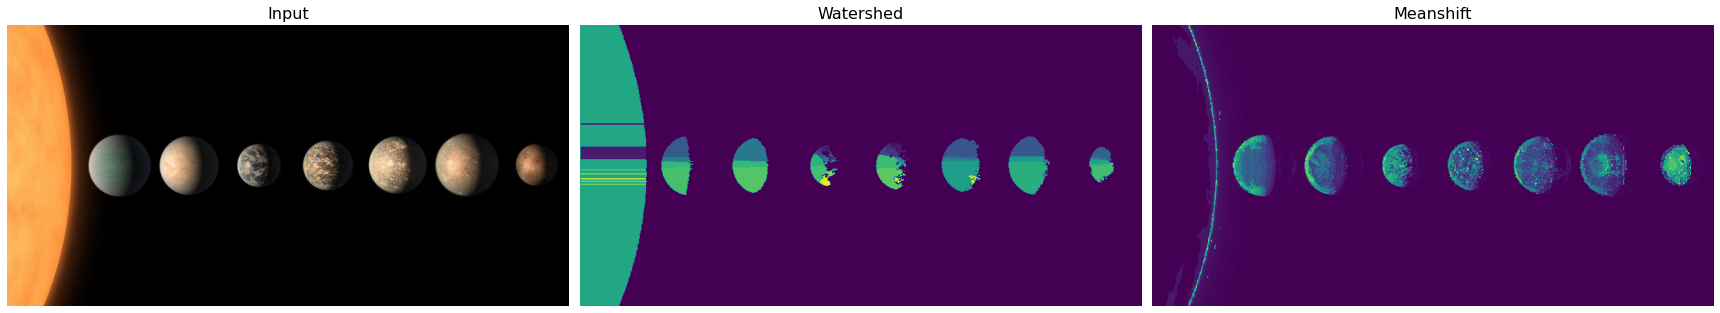

In [51]:
# set the image as 8 with 3 images
plt.figure(figsize=(24,8))

# The first image is the Input planets
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Input',fontsize=16)
plt.imshow(planet_rgb)

# The second image is the Watershed output
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Watershed',fontsize=16)
plt.imshow(planet_labels)

# The second image is the Meanshift output
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Meanshift',fontsize=16)
plt.imshow(new_planet)

# Save the image
plt.tight_layout()
plt.savefig("Q3_planets_output.jpg")
plt.show()


#### Conclusion:<br>
#### From the picture given above, we can easily find the result of Meanshift is better than Watershed.<br>
#### You can also find that the watershed method lost some details of the picture. Furthermore, The <br>
#### quality is also due to the threshold process. If the result of doing the threshold is good, the<br>
#### quality of watershed is higher.